In [52]:
import numpy as np
import sympy as sp
from scipy.constants import epsilon_0,mu_0,c
import matplotlib.pyplot as plt

C is approx= 1.648356773445782e-06


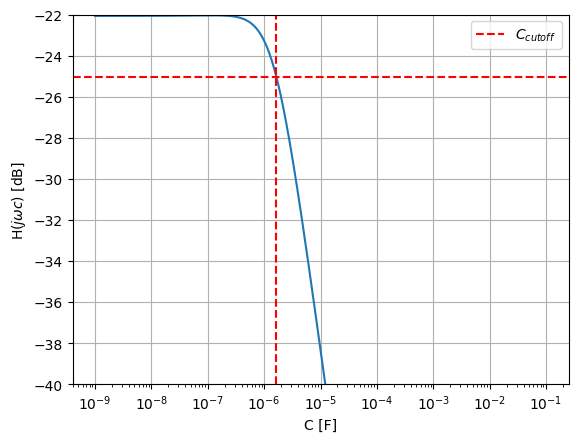

In [ ]:
# Beregning af input impedans for operationsforstærker kredsløbet
V=5
I=0.2
Z_in = V/I
L1 = 11.75e-3 # Induktansen af receiver-spole
R1 = 41.9 # Ohmsk modstand af receiver-spole
R2 = Z_in # Input impedans
f_c = 4200 #Cutoff-frekvens
w_c = 2*np.pi*f_c
C = np.logspace(-9, -1, 1000000) # Cutoff-frekvensen holdes fast og kapacitansen "sweepes"
Zl = 1j*w_c*L1
Zc = 1/(1j*w_c*C)
Zshunt = 1/(1/Zc + 1/R2)
H = Zshunt / (R1 + Zl + Zshunt)
H_dB = 20*np.log10(np.abs(H))
H_max = np.max(H_dB)
H_cut = H_max -3

def C_attenuation(C, H_dB, level):
    idx = np.argmin(np.abs(H_dB-level))
    return C[idx]

C_cut = C_attenuation(C,H_dB, H_cut)
print("C is approx=", C_cut)
plt.figure()
plt.semilogx(C, H_dB)
plt.axhline(-3+H_max, linestyle="--", color='r') # Siden der er en startdæmpning på omkring 22dB, laves filteret relativt til dette, så cutoff frekvensen dæmper omkring 25dB.
plt.axvline(C_cut,linestyle='--',color='r',label="$C_{cutoff}$")
plt.xlabel("C [F]")
plt.ylabel("H$(j\omega c) $ [dB]")
plt.grid(True)
plt.ylim([-40,-22])
plt.legend()
plt.show()